[1.         0.98405685 0.98405685 0.98405685 0.98405685 0.98405685
 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685
 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685
 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685
 0.98405685 0.98405685 0.98405685 0.98405685 0.98405685 0.73183994
 0.73183994 0.95699891 0.95699891 0.98863519 0.98863519 0.60555403
 0.60540805 0.60540805 0.60540805 0.6767391  0.6767391  0.6767391
 0.57215836 0.57215836 0.98498168 0.42308824 0.42308824 0.42308824
 0.42308824 0.42308824 0.93969864 0.3378507  0.3378507  0.33959833
 0.33959833 0.42888635 0.42888635 0.45143994 0.90582849 0.90582849
 0.90582849 0.90582849 0.90582849 0.90582849 0.90582849 0.90582849
 0.90582849 0.40951567 0.99797655 0.99797655 0.99797655 0.99797655
 0.99797655 0.99797655 0.99034432 0.96806884 0.74263235 0.74263235
 0.73037834 0.73037834 0.70737478 0.70737478 0.70737478 0.70737478
 0.70737478 0.70737478 0.70737478 0.68834317 0.68834317 0.48997

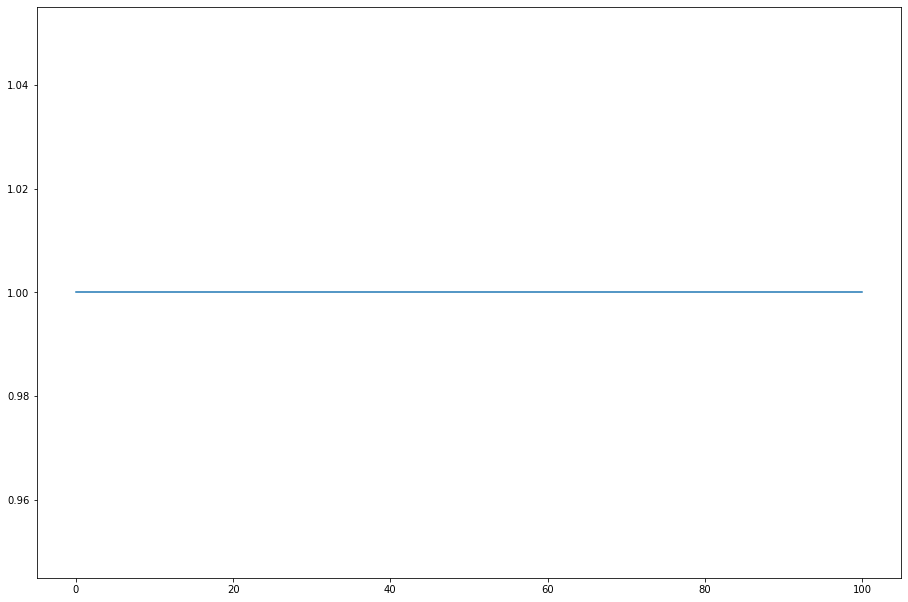

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta,norm


def p_pdf(x):
    
    return beta.pdf(x,2,1)

rng = np.random.default_rng()
s = rng.uniform(0,1,1000) 
u1 = s[:500]  
u2 = s[500:] 
x1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)  
x2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2) 
x_proposed = np.concatenate((x1,x2), axis=0) 
q_pdf = norm.pdf(x_proposed, 1)

def sample_from_q(x_current):
    
    x_proposed = rng.normal(x_current,1)
    return x_proposed

def metropolis_hastings(p_pdf, q_pdf, n, sample_from_q, init):
    
    samples = np.empty((n))
    diff = np.array([])
    samples[0] = init

    for i in range(n-1):
        x_current = samples[i]
        x_proposed = sample_from_q(x_current)

        alpha = p_pdf(x_proposed) / p_pdf(x_current)
        r = min(1.0, alpha)

        u = rng.random()

        if u < r:
            samples[i+1] = x_proposed
        else:
            samples[i+1] = x_current
        delta = np.max(np.abs(np.arange(len(np.sort(samples))/float(len(np.sort(samples))))-beta.cdf(samples,2,1)))
        diff = np.append(diff,delta)

    return samples,diff

samples,diff = metropolis_hastings(p_pdf, q_pdf, 100, sample_from_q, 1)

print(samples)


fig, ax = plt.subplots(1, 1) 
fig.set_size_inches(15.5, 10.5)
plt.plot(np.linspace(0,100,99),diff)
plt.show()

